<a href="https://colab.research.google.com/github/Gaks978/DML-Checkpoint/blob/main/Unsupervised_Learning_Clustering_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

Instructions

1) Import you data and perform basic data exploration phase
Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )

2) Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')

4) Perform partitional clustering using the K-means algorithm. Then, plot the clusters.

5) Find the best k value and plot the clusters again.

6) Interpret the results

# Import Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df = pd.read_csv('/content/Credit_card_dataset.csv')
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [ ]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [ ]:
# Removing rows with missing values
df_cleaned = df.dropna()

In [ ]:
print(df_cleaned)

     CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0     C10001           0.818182      95.40   201.802084        1000.0   
1     C10002           0.909091       0.00  4103.032597        7000.0   
2     C10003           1.000000     773.17   622.066742        7500.0   
3     C10004           0.636364    1499.00     0.000000        7500.0   
4     C10005           1.000000      16.00   678.334763        1200.0   
...      ...                ...        ...          ...           ...   
8945  C19186           1.000000     291.12   325.594462        1000.0   
8946  C19187           1.000000     300.00   275.861322        1000.0   
8947  C19188           0.833333     144.40    81.270775        1000.0   
8948  C19189           0.833333       0.00    52.549959         500.0   
8949  C19190           0.666667    1093.25    63.165404        1200.0   

      CASH_ADVANCE  
0         0.000000  
1      6442.945483  
2         0.000000  
3       205.788017  
4         0.000000

In [ ]:
# Check duplicates
df_cleaned.duplicated().sum()

np.int64(0)

<Axes: >

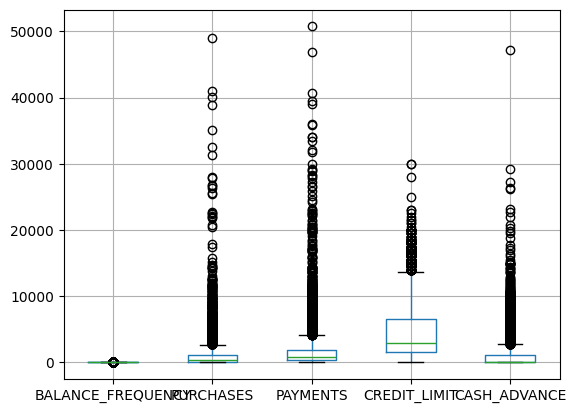

In [ ]:
# Plot outliers
df_cleaned.boxplot()

In [ ]:
# Managing outliers
numeric_cols = ['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']

# Remove outliers based on IQR
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

In [ ]:
print(f"Remaining rows after outlier removal: {df_cleaned.shape[0]}")

Remaining rows after outlier removal: 5564


In [ ]:
# Select only the numeric features you want to scale
features_to_scale = ['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']

# Initialize and apply the scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[features_to_scale])

In [ ]:
# Distinct features used to cluster
df1 = df_cleaned[['PURCHASES', 'CREDIT_LIMIT']]

# Building Clusters

In [ ]:
# Hierarchical clustering
# Agglomerative clustering
agglo = AgglomerativeClustering(linkage='ward')
agglo_labels = agglo.fit_predict(df1)
agglo_silhouette_score = silhouette_score(df1, agglo_labels)
print('Agglomerative Silhouette: ', agglo_silhouette_score)

Agglomerative Silhouette:  0.6349379302966265


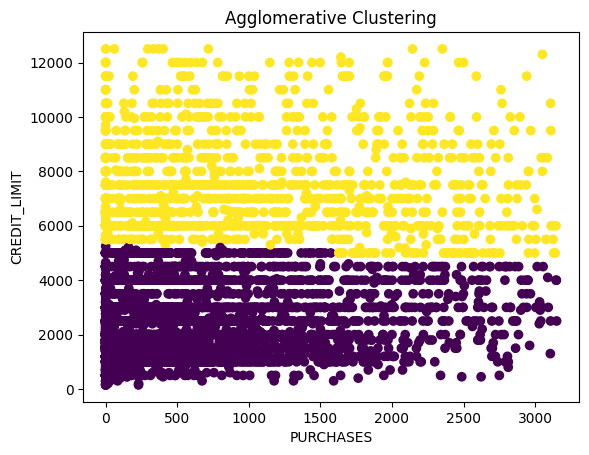

In [ ]:
# Plotting agglomerative clustering
plt.scatter(df1['PURCHASES'], df1['CREDIT_LIMIT'], c=agglo_labels, cmap = 'viridis')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('Agglomerative Clustering')
plt.show()

In [ ]:
# Partitional Clustering
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df1)
kmeans_silhouette_score = silhouette_score(df1, kmeans_labels)
print('K_means Silhouette: ', kmeans_silhouette_score)

K_means Silhouette:  0.4592565293342861


<function matplotlib.pyplot.show(close=None, block=None)>

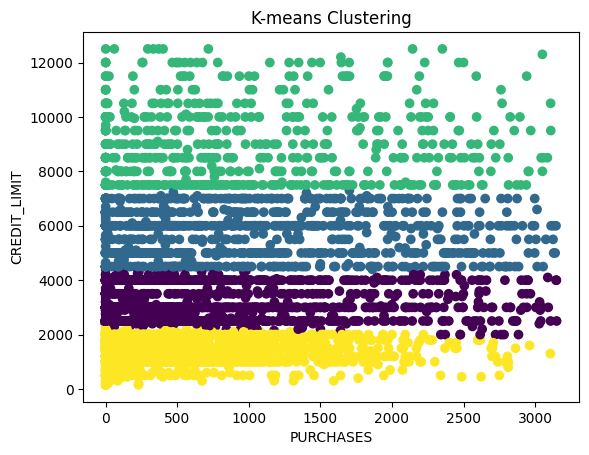

In [ ]:
# Plotting K-means cluster
plt.scatter(df1['PURCHASES'], df1['CREDIT_LIMIT'], c=kmeans_labels, cmap = 'viridis')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('K-means Clustering')
plt.show

Text(0, 0.5, 'Inertia')

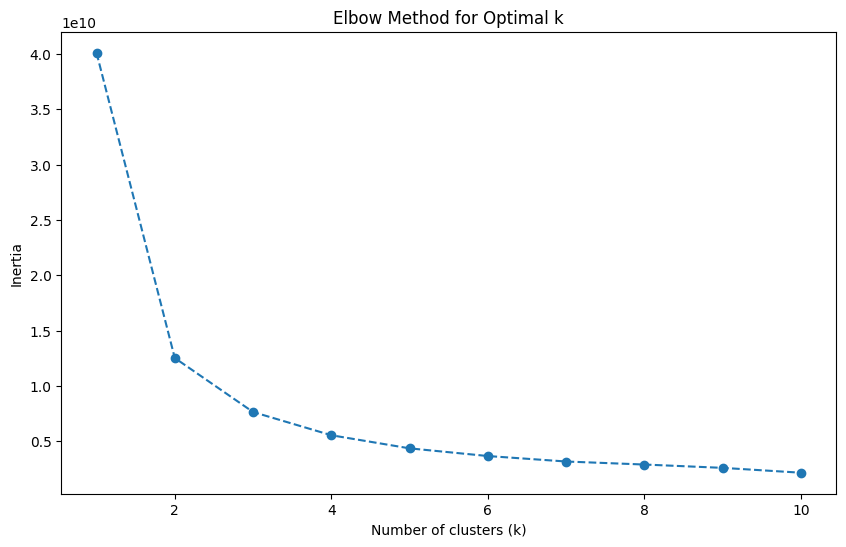

In [ ]:
# Plot the optimal k using the elbow method

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")


In [ ]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df1)
kmeans_silhouette_score = silhouette_score(df1, kmeans_labels)
print('K_means Silhouette: ', kmeans_silhouette_score)

K_means Silhouette:  0.5569667660660637


<function matplotlib.pyplot.show(close=None, block=None)>

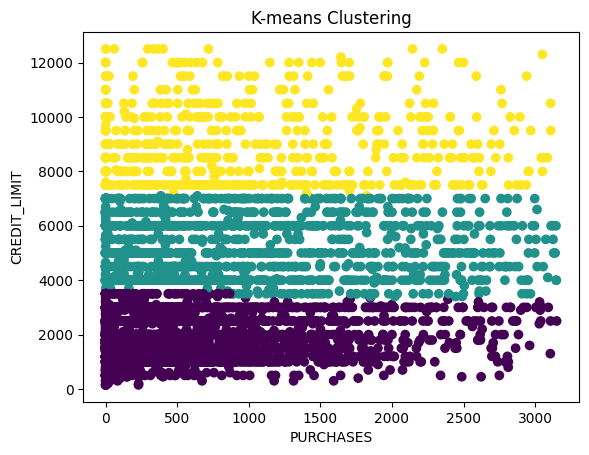

In [ ]:
# Plotting the clusters again
plt.scatter(df1['PURCHASES'], df1['CREDIT_LIMIT'], c=kmeans_labels, cmap = 'viridis')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('K-means Clustering')
plt.show

# Interpreting The Results


* Purchases tend to decline with time no matter the credit limit.

